# Evaporation from KNMI data
*R.A. Collenteur, University of Graz, 2020*

In this notebook it is shown how to compute (potential) evaporation from meteorological data observed by the KNMI at De Bilt in the Netherlands.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pyet as pyet

## 1. Load KNMI Data


- DDVEC     = Vectorgemiddelde windrichting in graden (360=noord, 90=oost, 180=zuid, 270=west, 0=windstil/variabel). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken / Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=calm/variable)
- FHVEC     = Vectorgemiddelde windsnelheid (in 0.1 m/s). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken / Vector mean windspeed (in 0.1 m/s)
- FG        = Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s) 
- FHX       = Hoogste uurgemiddelde windsnelheid (in 0.1 m/s) / Maximum hourly mean windspeed (in 0.1 m/s)
- FHXH      = Uurvak waarin FHX is gemeten / Hourly division in which FHX was measured
- FHN       = Laagste uurgemiddelde windsnelheid (in 0.1 m/s) / Minimum hourly mean windspeed (in 0.1 m/s)
- FHNH      = Uurvak waarin FHN is gemeten / Hourly division in which FHN was measured
- FXX       = Hoogste windstoot (in 0.1 m/s) / Maximum wind gust (in 0.1 m/s)
- FXXH      = Uurvak waarin FXX is gemeten / Hourly division in which FXX was measured
- TG        = Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
- TN        = Minimum temperatuur (in 0.1 graden Celsius) / Minimum temperature (in 0.1 degrees Celsius)
- TNH       = Uurvak waarin TN is gemeten / Hourly division in which TN was measured
- TX        = Maximum temperatuur (in 0.1 graden Celsius) / Maximum temperature (in 0.1 degrees Celsius)
- TXH       = Uurvak waarin TX is gemeten / Hourly division in which TX was measured
- T10N      = Minimum temperatuur op 10 cm hoogte (in 0.1 graden Celsius) / Minimum temperature at 10 cm above surface (in 0.1 degrees Celsius)
- T10NH     = 6-uurs tijdvak waarin T10N is gemeten / 6-hourly division in which T10N was measured; 6=0-6 UT, 12=6-12 UT, 18=12-18 UT, 24=18-24 UT 
- SQ        = Zonneschijnduur (in 0.1 uur) berekend uit de globale straling (-1 voor <0.05 uur) / Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour)
- SP        = Percentage van de langst mogelijke zonneschijnduur / Percentage of maximum potential sunshine duration
- Q         = Globale straling (in J/cm2) / Global radiation (in J/cm2)
- DR        = Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
- RH        = Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- RHX       = Hoogste uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- RHXH      = Uurvak waarin RHX is gemeten / Hourly division in which RHX was measured
- PG        = Etmaalgemiddelde luchtdruk herleid tot zeeniveau (in 0.1 hPa) berekend uit 24 uurwaarden / Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values
- PX        = Hoogste uurwaarde van de luchtdruk herleid tot zeeniveau (in 0.1 hPa) / Maximum hourly sea level pressure (in 0.1 hPa)
- PXH       = Uurvak waarin PX is gemeten / Hourly division in which PX was measured
- PN        = Laagste uurwaarde van de luchtdruk herleid tot zeeniveau (in 0.1 hPa) / Minimum hourly sea level pressure (in 0.1 hPa)
- PNH       = Uurvak waarin PN is gemeten / Hourly division in which PN was measured
- VVN       = Minimum opgetreden zicht / Minimum visibility; 0: <100 m, 1:100-200 m, 2:200-300 m,..., 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)
- VVNH      = Uurvak waarin VVN is gemeten / Hourly division in which VVN was measured
- VVX       = Maximum opgetreden zicht / Maximum visibility; 0: <100 m, 1:100-200 m, 2:200-300 m,..., 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)
- VVXH      = Uurvak waarin VVX is gemeten / Hourly division in which VVX was measured
- NG        = Etmaalgemiddelde bewolking (bedekkingsgraad van de bovenlucht in achtsten, 9=bovenlucht onzichtbaar) / Mean daily cloud cover (in octants, 9=sky invisible)
- UG        = Etmaalgemiddelde relatieve vochtigheid (in procenten) / Daily mean relative atmospheric humidity (in percents)
- UX        = Maximale relatieve vochtigheid (in procenten) / Maximum relative atmospheric humidity (in percents)
- UXH       = Uurvak waarin UX is gemeten / Hourly division in which UX was measured
- UN        = Minimale relatieve vochtigheid (in procenten) / Minimum relative atmospheric humidity (in percents)
- UNH       = Uurvak waarin UN is gemeten / Hourly division in which UN was measured
- EV24      = Referentiegewasverdamping (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)

In [2]:
data = pd.read_csv("data/etmgeg_260.txt", skiprows=46, delimiter=",", 
                   skipinitialspace=True, index_col="YYYYMMDD", parse_dates=True).loc["2018",:]
data.head()

,# STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2018-01-01,260,225,45,50,90,2,10,18,190.0,2.0,...,2.0,75.0,3.0,7.0,84,96,17,73,1,3
2018-01-02,260,216,39,45,80,24,20,1,140.0,24.0,...,19.0,75.0,8.0,7.0,88,96,3,80,8,2
2018-01-03,260,257,82,88,120,11,70,4,290.0,3.0,...,1.0,75.0,4.0,8.0,73,95,1,65,9,1
2018-01-04,260,238,51,56,90,20,30,14,180.0,20.0,...,14.0,80.0,21.0,8.0,82,97,14,67,21,2
2018-01-05,260,225,38,40,60,1,20,17,150.0,16.0,...,15.0,75.0,1.0,6.0,87,96,17,71,3,2


In [3]:
meteo = pd.DataFrame({"tmean":data.TG/10, "tmax":data.TX/10, "tmin":data.TN/10, "rh":data.UG, "wind":data.FG/10, "rs":data.Q/100})
tmean, tmax, tmin, rh, wind, rs = [meteo[col] for col in meteo.columns]
pressure =  data.PG / 100 # to kPa
wind = data.FG/10  # to m/s
lat = 0.91
elevation = 4 
et_knmi = data.EV24 / 10

## 2. Estimating evaporation - JOSS paper

In [4]:
et_penman = pyet.penman(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)
et_pt = pyet.priestley_taylor(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)
et_makkink = pyet.makkink(tmean, rs, elevation=4, pressure=pressure)
et_oudin = pyet.oudin(tmean, lat=0.91)

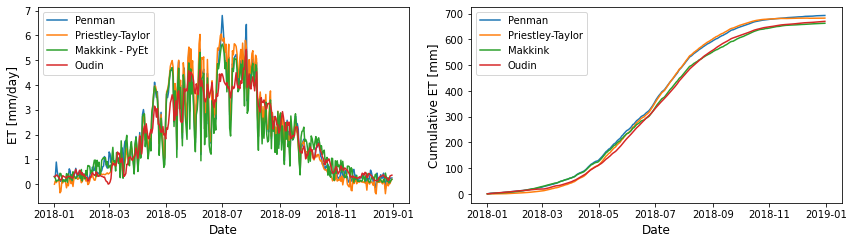

In [5]:
fig, axs = plt.subplots(figsize=(12,3.5), ncols=2)
axs[0].plot(et_penman,label="Penman")
axs[0].plot(et_pt, label="Priestley-Taylor")
axs[0].plot(et_makkink, label="Makkink - PyEt")
axs[0].plot(et_oudin, label="Oudin")
axs[1].plot(et_penman.cumsum(),label="Penman")
axs[1].plot(et_pt.cumsum(), label="Priestley-Taylor")
axs[1].plot(et_makkink.cumsum(), label="Makkink")
axs[1].plot(et_oudin.cumsum(), label="Oudin")
axs[0].set_ylabel("ET [mm/day]", fontsize=12)
axs[1].set_ylabel("Cumulative ET [mm]", fontsize=12)
for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)
    axs[i].legend(loc=2)
plt.tight_layout()
plt.savefig("Figure1.png", dpi=300)

# 3. Estimation of ET - all methods

In [6]:
et_hamon = pyet.hamon(tmean, 0.91)
et_har = pyet.hargreaves(tmean, tmax, tmin, lat)
et_jh1 = pyet.jensen_haise(tmean, rs=rs, method=1)
et_jh2 = pyet.jensen_haise(tmean, lat=0.91, method=2)
et_oudin = pyet.oudin(tmean, lat=0.91)
et_abtew = pyet.abtew(tmean, rs)
et_turc = pyet.turc(tmean, rs, rh)
et_mg = pyet.mcguinness_bordne(tmean, lat=0.91)
et_linacre = pyet.linacre(tmean, 4, 0.91, tmax=tmax, tmin=tmin)
et_romanenko = pyet.romanenko(tmean, rh) 
et_fao56 = pyet.pm_fao56(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)
et_pm = pyet.pm(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)
et_kb = pyet.kimberly_penman(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)
et_fao24 = pyet.fao_24(tmean, wind, rs=rs, rh=rh, elevation=4)
et_thom = pyet.thom_oliver(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)

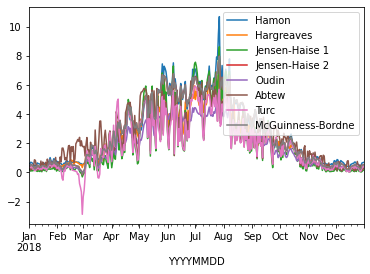

In [7]:
et_hamon.plot(label="Hamon")
et_har.plot(label="Hargreaves")
et_jh1.plot(label="Jensen-Haise 1")
et_jh2.plot(label="Jensen-Haise 2")
et_oudin.plot(label="Oudin")
et_abtew.plot(label="Abtew")
et_turc.plot(label="Turc")
et_mg.plot(label="McGuinness-Bordne")
plt.legend()

In [ ]:
et_linacre.plot(label="Linacre")
et_romanenko.plot(label="Romanenko")
et_fao56.plot(label="FAO-56")
et_pm.plot(label="Penman-Monteith")
et_kb.plot(label="Kimberley-Penman")
et_fao24.plot(label="FAO-24")
et_thom.plot(label="Thon and Oliver")
plt.legend()